In [17]:
import reconstruction as re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
excel_directory = 'data.xlsx'

df = pd.read_excel (excel_directory, sheet_name="Sheet3")

# df = re.convertExcel2Dataframe (excel_directory)

df

,Hossein Behzad,Mahmud Farshchian,Majid Mehregan
0,1023.671875,1022.972656,1018.000000
1,1023.765625,1020.074219,1016.328125
2,1023.539062,1023.996094,1022.921875
3,1023.597656,1017.132812,1018.191406
4,1021.335938,1019.632812,1016.332031
5,1024.000000,1021.527344,1019.269531
6,1023.492188,1019.125000,NaN
7,1016.863281,1022.328125,NaN
8,1016.468750,1016.015625,NaN
9,1022.773438,1023.019531,NaN


In [43]:
x = np.array (df ['Hossein Behzad'])
x_cleaned = x [~np.isnan(x)]

x_cleaned

array([1023.671875  , 1023.765625  , 1023.5390625 , 1023.59765625,
       1021.3359375 , 1024.        , 1023.4921875 , 1016.86328125,
       1016.46875   , 1022.7734375 , 1023.85546875, 1016.125     ,
       1023.94921875, 1020.29296875, 1016.9140625 , 1014.4375    ,
       1020.33984375, 1021.8046875 , 1016.1640625 , 1021.99609375,
       1016.12109375, 1021.359375  , 1015.98828125, 1022.61328125,
       1018.05859375, 1016.7421875 , 1019.6875    , 1018.5       ,
       1016.94921875])

In [50]:
np.array (x for x in df['Hossein Behzad'] if x is not np.isnan)

array(<generator object <genexpr> at 0x0000017DC7164110>, dtype=object)

In [63]:
x = np.array (df ['Hossein Behzad'])

boxplot_data = [np.array (df ['Hossein Behzad']), np.array (df['Mahmud Farshchian']), np.array (df['Majid Mehregan'])]
for i in range (len (boxplot_data)): # Removing NaN values
    boxplot_data [i] = boxplot_data [i] [~np.isnan (boxplot_data [i])]

boxplot_data

[array([1023.671875  , 1023.765625  , 1023.5390625 , 1023.59765625,
        1021.3359375 , 1024.        , 1023.4921875 , 1016.86328125,
        1016.46875   , 1022.7734375 , 1023.85546875, 1016.125     ,
        1023.94921875, 1020.29296875, 1016.9140625 , 1014.4375    ,
        1020.33984375, 1021.8046875 , 1016.1640625 , 1021.99609375,
        1016.12109375, 1021.359375  , 1015.98828125, 1022.61328125,
        1018.05859375, 1016.7421875 , 1019.6875    , 1018.5       ,
        1016.94921875]),
 array([1022.97265625, 1020.07421875, 1023.99609375, 1017.1328125 ,
        1019.6328125 , 1021.52734375, 1019.125     , 1022.328125  ,
        1016.015625  , 1023.01953125, 1016.0234375 , 1016.99609375,
        1020.2734375 , 1023.9765625 , 1018.609375  , 1023.296875  ,
        1022.26171875, 1023.25390625, 1022.7109375 , 1022.359375  ,
        1017.63671875, 1022.88671875, 1021.734375  , 1017.15234375,
        1020.0625    , 1021.22265625, 1017.94140625, 1016.796875  ,
        1023.33984375, 

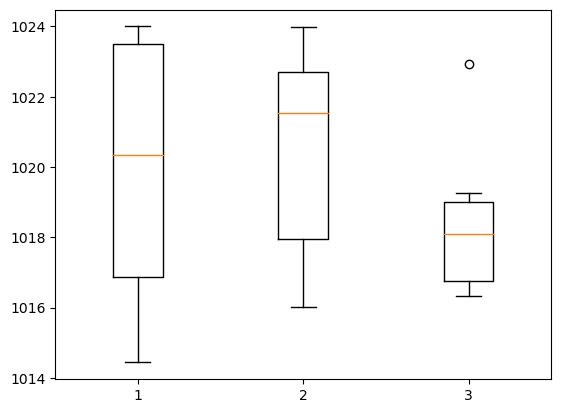

In [64]:
plt.boxplot (boxplot_data, patch_artist=False, notch=False)
plt.show ()